In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

print(f"TensorFlow Version: {tf.__version__}")
tf.random.set_seed(42)


TensorFlow Version: 2.18.0


In [2]:
# Constants
NUM_CLASSES = 43
IMG_SIZE = (30, 30)
cur_path = Path.cwd()

# Load training data
data = []
labels = []

for i in range(NUM_CLASSES):
    folder_path = cur_path / 'train' / str(i)
    if not folder_path.exists():
        print(f"Folder {folder_path} not found!")
        continue

    for img_name in os.listdir(folder_path):
        try:
            image = Image.open(folder_path / img_name)
            image = image.resize(IMG_SIZE)
            data.append(np.array(image))
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")


In [3]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


In [4]:
print("Sample data:", data[0])
print("Sample label:", labels[0])

Sample data: [[[ 75  78  80]
  [ 74  76  78]
  [ 85  86  84]
  ...
  [ 68  75  74]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 83  84  86]
  [ 80  80  82]
  [ 88  88  83]
  ...
  [ 73  77  78]
  [ 76  78  75]
  [ 80  80  78]]

 [[ 78  78  80]
  [ 86  85  86]
  [ 90  89  90]
  ...
  [ 71  74  71]
  [ 73  74  69]
  [ 78  78  74]]

 ...

 [[133 134 139]
  [123 127 132]
  [112 121 125]
  ...
  [ 94  95  89]
  [ 97  98  91]
  [ 99 103  99]]

 [[ 91  95  99]
  [ 91  98 103]
  [ 75  86  90]
  ...
  [104 102  96]
  [110 113 104]
  [ 96 104  98]]

 [[ 85  84  87]
  [ 95 101 107]
  [ 63  76  81]
  ...
  [103 103  95]
  [ 99 102  90]
  [ 90  97  89]]]
Sample label: 0


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# Normalize image data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


c:\Users\nguye\anaconda3\envs\traffic-sign\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.3615 - loss: 2.3456 - val_accuracy: 0.9598 - val_loss: 0.1469
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9076 - loss: 0.3006 - val_accuracy: 0.9809 - val_loss: 0.0720
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9479 - loss: 0.1785 - val_accuracy: 0.9903 - val_loss: 0.0381
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9616 - loss: 0.1292 - val_accuracy: 0.9917 - val_loss: 0.0303
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9693 - loss: 0.1061 - val_accuracy: 0.9922 - val_loss: 0.0306
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9737 - loss: 0.0963 - val_accuracy: 0.9941 - val_loss: 0.0248
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9769 - loss: 0.0765 - val_accuracy: 0.9936 - val_loss: 0.0234
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9800 - loss: 0.0658 - 

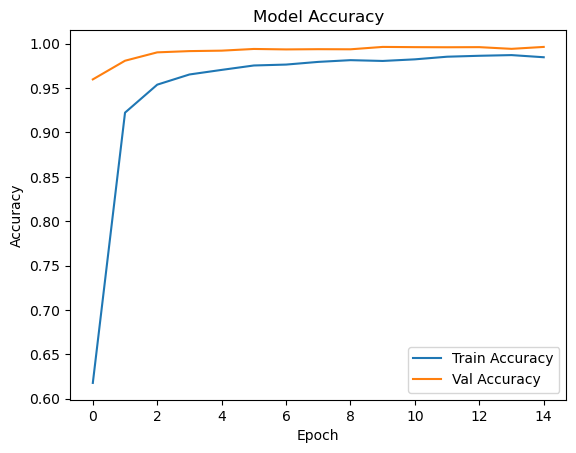

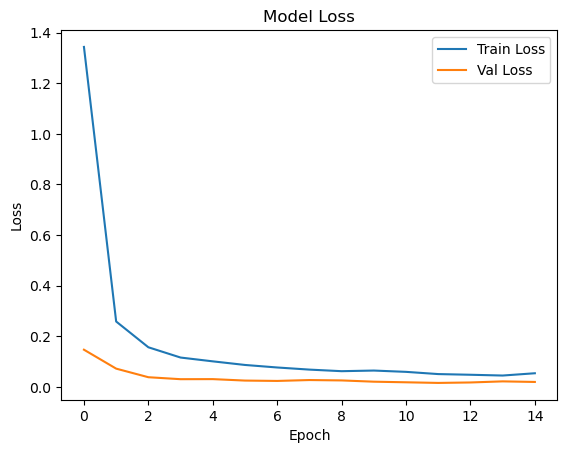

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Test Accuracy: 97.32%


In [6]:

# Build model
model = tf.keras.Sequential([
    # , input_shape=X_train.shape[1:]
    tf.keras.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_test, y_test)
)

# Save model
model.save("my_model.keras")

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [7]:

# Load test data
test_df = pd.read_csv('Test.csv')
true_labels = test_df["ClassId"].values
image_paths = test_df["Path"].values

test_data = []
for img_path in image_paths:
    try:
        image = Image.open(img_path)
        image = image.resize(IMG_SIZE)
        test_data.append(np.array(image))
    except Exception as e:
        print(f"Error loading test image {img_path}: {e}")

X_final_test = np.array(test_data).astype('float32') / 255.0

# Predict and evaluate
predictions = model.predict(X_final_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Test Accuracy: 97.32%
